## 1. Model de buzzfeed

Aquest dataset el va fer públic la revista BuzzFeed. Tracta de 19799 avions registrats durant mesos.
Aquests avions de vigilancia o surveil, també anomenats espia, eren avions operats per l'FBI i per DHG que volen dins de l'espai aèri americà.
L'objectiu era entrenar un ordinador per detectar patrons i saber si es tractava d'un avió de vigilància o no. 

In [1]:
import pandas as pd
bfeed = pd.read_csv("planes_features.csv")
bfeed.head()

adshex  duration1  duration2  duration3  duration4  duration5    boxes1  \
0       A   0.120253   0.075949   0.183544   0.335443   0.284810  0.088608   
1  A00000   0.211735   0.155612   0.181122   0.198980   0.252551  0.204082   
2  A00002   0.517241   0.103448   0.103448   0.103448   0.172414  0.862069   
3  A00008   0.125000   0.041667   0.208333   0.166667   0.458333  0.125000   
4  A0001E   0.100000   0.200000   0.200000   0.400000   0.100000  0.100000   

     boxes2    boxes3    boxes4  ...    steer3    steer4    steer5    steer6  \
0  0.044304  0.069620  0.120253  ...  0.270550  0.344090  0.097317  0.186651   
1  0.183673  0.168367  0.173469  ...  0.240732  0.356314  0.116116  0.159325   
2  0.137931  0.000000  0.000000  ...  0.174954  0.244015  0.034070  0.202578   
3  0.083333  0.125000  0.166667  ...  0.202665  0.380515  0.094669  0.182904   
4  0.000000  0.100000  0.400000  ...  0.249206  0.326984  0.112698  0.206349   

     steer7    steer8  flights  squawk_1  observations  type  
0  0.011379  0.009426      158         0         11776  GRND  
1  0.012828  0.013628      392         0         52465  TBM7  
2  0.021179  0.068140       29         0          1086  SHIP  
3  0.014706  0.020221       24         0          2176  PA46  
4  0.012698  0.011111       10      1135           630  C56X  

[5 rows x 33 columns]

In [452]:
bfeed.columns

Index(['adshex', 'duration1', 'duration2', 'duration3', 'duration4',
       'duration5', 'boxes1', 'boxes2', 'boxes3', 'boxes4', 'boxes5', 'speed1',
       'speed2', 'speed3', 'speed4', 'speed5', 'altitude1', 'altitude2',
       'altitude3', 'altitude4', 'altitude5', 'steer1', 'steer2', 'steer3',
       'steer4', 'steer5', 'steer6', 'steer7', 'steer8', 'flights', 'squawk_1',
       'observations', 'type'],
      dtype='object')

In [2]:
bfeed.shape #Tinc un datset amb 19799 avions diferents que han sigut registrats a l'espai aeri dels estats units durant un mesos.

(19799, 33)

In [3]:
train_test = pd.read_csv("train.csv") 

In [4]:
train_test.head() #Per fer el train-test utilitzaré 597 avions dels quals se la seva variable objectiu.

adshex    class
0  A00C4B  surveil
1  A0AB21  surveil
2  A0AE77  surveil
3  A0AE7C  surveil
4  A0C462  surveil

In [5]:
train_test.shape #Aquest df conté la variable objectiu de tots els avions que utilitzaré per fer el train test.

(597, 2)

In [6]:
train_test = train_test.rename(columns={"class": "target"}) 
#Canvio el nom de la var objectiu per no tenir problemes amb la paraula reservada "class".

In [7]:
train_test.target.unique() #Pot ser surveil o bé other. He de convertirla a binaria.

array(['surveil', 'other'], dtype=object)

In [8]:
train_test['target'] = train_test['target'].apply(lambda x: 1 if x == "surveil" else 0)

In [9]:
train_test.target.unique() #Si és surveil serà 1, si es other serà 0.

array([1, 0], dtype=int64)

In [10]:
train_test.target.value_counts() #97 dels 597 avions son surveil, la resta son other.

target
0    500
1     97
Name: count, dtype: int64

In [537]:
df_final = train_test.merge(bfeed, on='adshex', how='right') 
#Concateno els dos df per la variable adshex que és el codi d'identificació únic per cada avió.
df_final.head()

adshex  target  duration1  duration2  duration3  duration4  duration5  \
0       A     NaN   0.120253   0.075949   0.183544   0.335443   0.284810   
1  A00000     NaN   0.211735   0.155612   0.181122   0.198980   0.252551   
2  A00002     0.0   0.517241   0.103448   0.103448   0.103448   0.172414   
3  A00008     NaN   0.125000   0.041667   0.208333   0.166667   0.458333   
4  A0001E     NaN   0.100000   0.200000   0.200000   0.400000   0.100000   

     boxes1    boxes2    boxes3  ...    steer3    steer4    steer5    steer6  \
0  0.088608  0.044304  0.069620  ...  0.270550  0.344090  0.097317  0.186651   
1  0.204082  0.183673  0.168367  ...  0.240732  0.356314  0.116116  0.159325   
2  0.862069  0.137931  0.000000  ...  0.174954  0.244015  0.034070  0.202578   
3  0.125000  0.083333  0.125000  ...  0.202665  0.380515  0.094669  0.182904   
4  0.100000  0.000000  0.100000  ...  0.249206  0.326984  0.112698  0.206349   

     steer7    steer8  flights  squawk_1  observations  type  
0  0.011379  0.009426      158         0         11776  GRND  
1  0.012828  0.013628      392         0         52465  TBM7  
2  0.021179  0.068140       29         0          1086  SHIP  
3  0.014706  0.020221       24         0          2176  PA46  
4  0.012698  0.011111       10      1135           630  C56X  

[5 rows x 34 columns]

In [538]:
df_final.shape #Té molts valors Nan ja que només conec la var target de 597 avions
#Entrenaré el model amb els 597 avions, la resta serviran per fer les prediccions.

(19799, 34)

In [539]:
df_final2 = df_final.dropna()
df_final2.shape #Elimino tots els Nans del df_final per poder fer el train-test del model.

(597, 34)

In [540]:
df_final2['target'] = df_final2['target'].apply(lambda x: 1 if x == 1.0 else 0)
#Per solucionar un problema amb els decimals

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\1677760207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['target'] = df_final2['target'].apply(lambda x: 1 if x == 1.0 else 0)


In [541]:
df_final2.target.unique()

array([0, 1], dtype=int64)

In [542]:
dff_final = df_final2.drop(["duration1","duration2","duration3","duration4","duration5","type","flights"], axis=1)
#Elimino aquestes columnes ja que no existeixen en el df que utilitzaré per fer les prediccions.

In [543]:
dff_final.shape #Elimino columnes que no m'interesen per fer el model

(597, 27)

In [544]:
dff_final.columns

Index(['adshex', 'target', 'boxes1', 'boxes2', 'boxes3', 'boxes4', 'boxes5',
       'speed1', 'speed2', 'speed3', 'speed4', 'speed5', 'altitude1',
       'altitude2', 'altitude3', 'altitude4', 'altitude5', 'steer1', 'steer2',
       'steer3', 'steer4', 'steer5', 'steer6', 'steer7', 'steer8', 'squawk_1',
       'observations'],
      dtype='object')

### Correlacions

In [545]:
df_final2.columns

Index(['adshex', 'target', 'duration1', 'duration2', 'duration3', 'duration4',
       'duration5', 'boxes1', 'boxes2', 'boxes3', 'boxes4', 'boxes5', 'speed1',
       'speed2', 'speed3', 'speed4', 'speed5', 'altitude1', 'altitude2',
       'altitude3', 'altitude4', 'altitude5', 'steer1', 'steer2', 'steer3',
       'steer4', 'steer5', 'steer6', 'steer7', 'steer8', 'flights', 'squawk_1',
       'observations', 'type'],
      dtype='object')

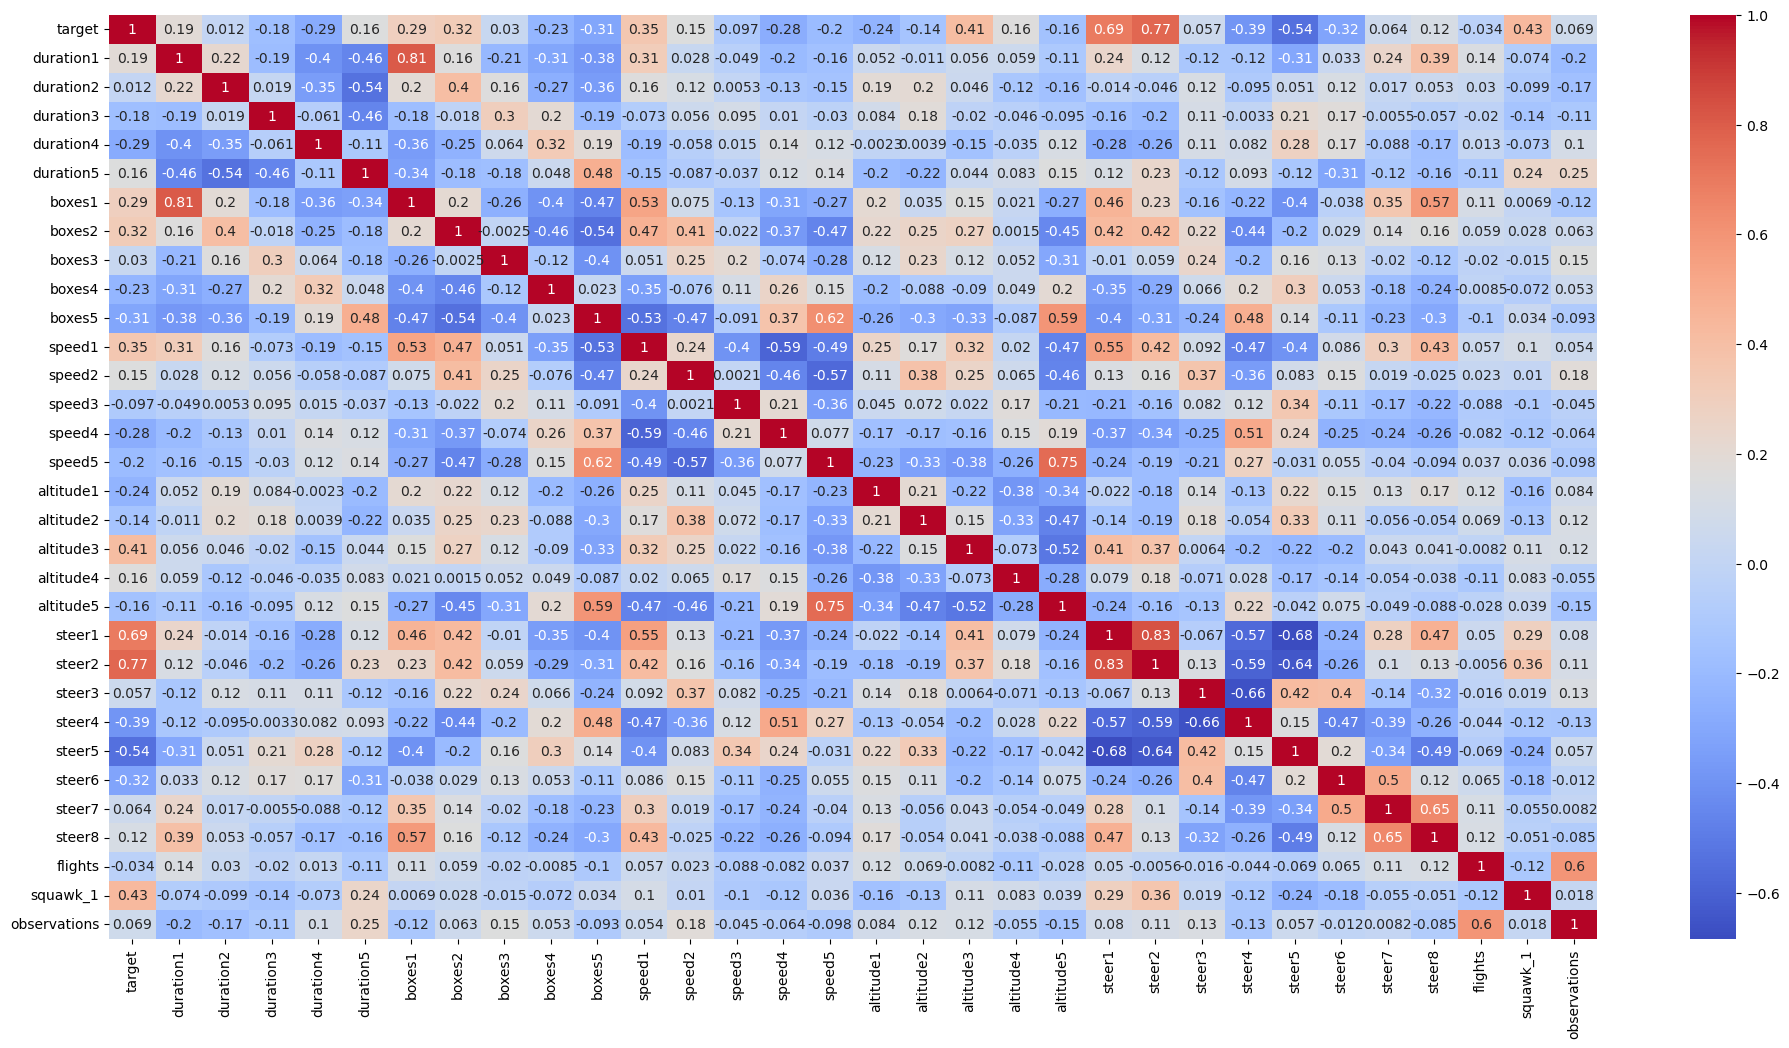

In [546]:
correlacio = df_final2.iloc[:, 1:-1].corr()
plt.figure(figsize=(24,12))
sns.heatmap(correlacio, cmap='coolwarm', annot=True)
plt.show()

Aquesta taula de correlacions no és del dataset final, sinó del dataset que conté totes les columnes. M'interesa fixar-me en les correlacions entre la variable target i les demés. Les variables que he eliminat son: les duracions i flights. Si ens fixem en la taula, la variable flight te una correlació practicament nula amb la variable target. Les duracions tenen poca correlació, però el fet d'eliminar-les segurament influeixi negativament amb el resultat. Recordo que elimino aquestes variables pel fet que no les tinc disponibles en el dataset de predicció, no per voluntat propia. En el millor dels casos, aquestes variables serien incloses a l'hora d'entrenar i testejar el model.

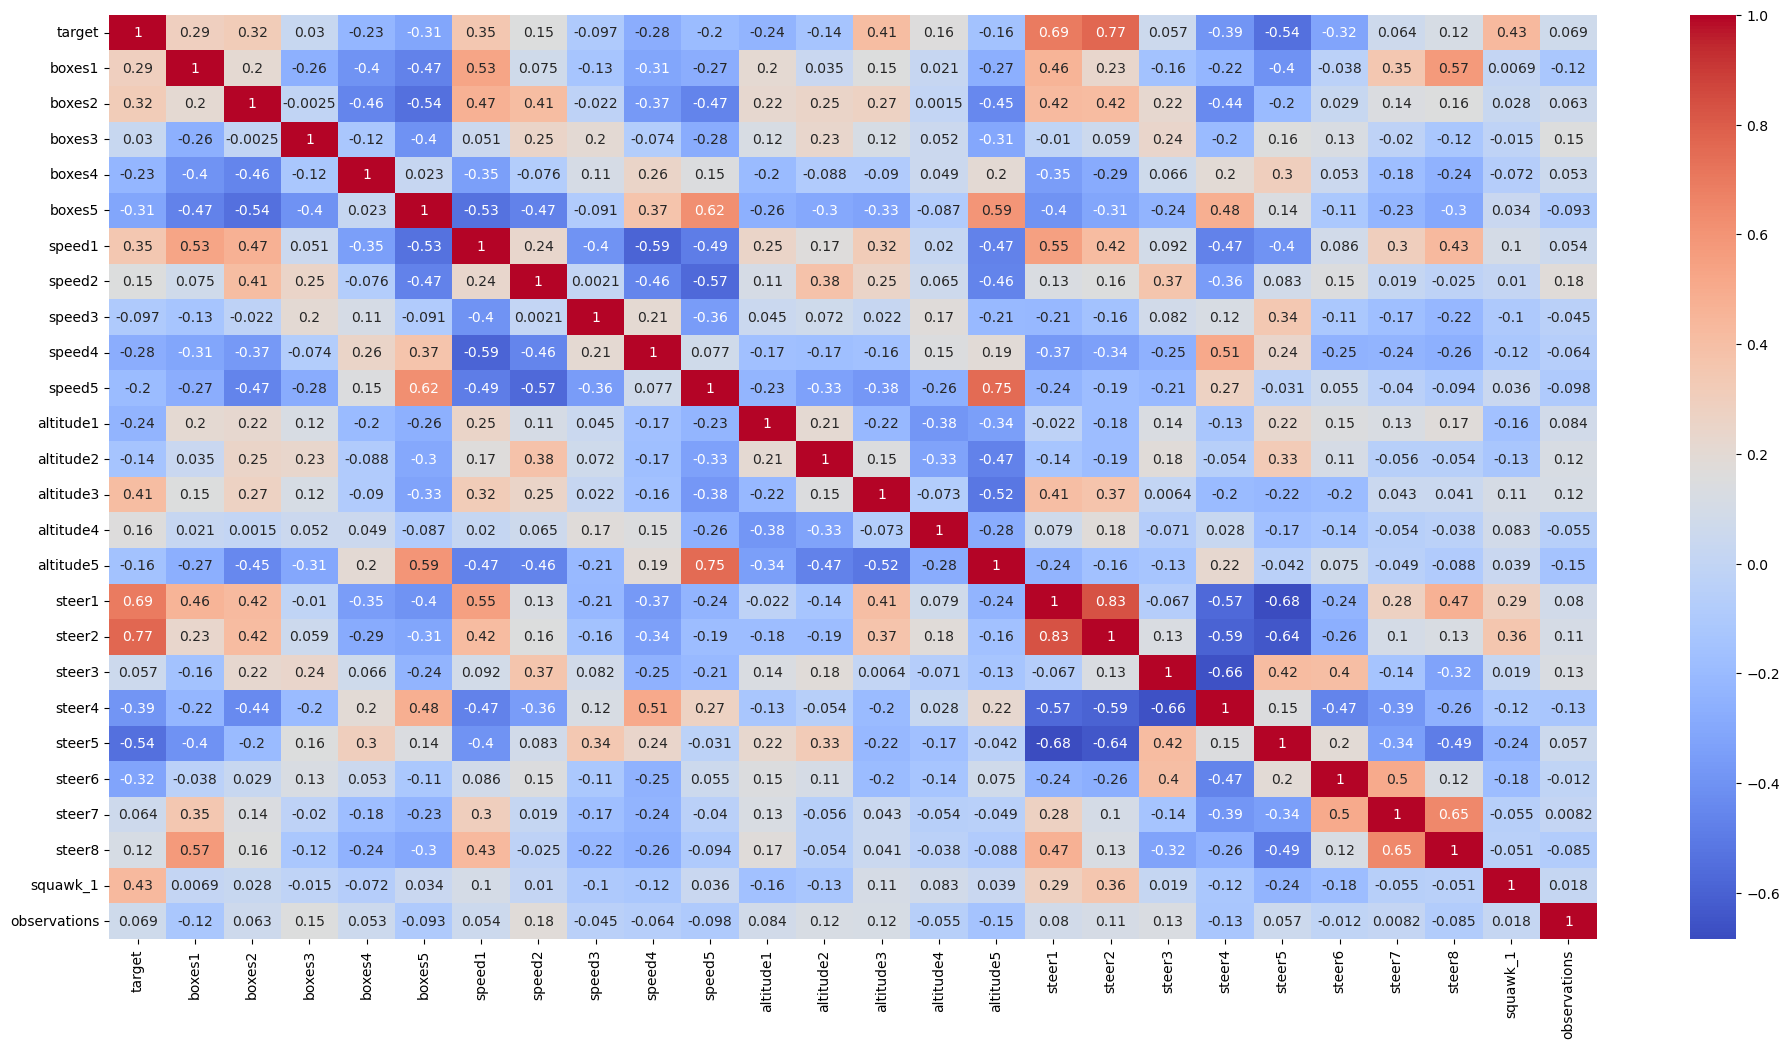

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
correlacio2 = dff_final.iloc[:, 1:].corr()
plt.figure(figsize=(24,12))
sns.heatmap(correlacio2, cmap='coolwarm', annot=True)
plt.show()

Aquest és el gràfic de correlació del dataset final. Hi han moltes variables amb una correlació significativa amb la variable target. Destaca steer2 i steer1.

### Train-test del model de buzzfeed.

In [517]:
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split 
X = dff_final.drop(["adshex","target"], axis=1)
y= dff_final[["target"]]

In [518]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(447, 25) (150, 25) (447, 1) (150, 1)


### Entrenant amb diferents models

In [519]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Suponiendo que tienes tus datos de entrenamiento y prueba ya definidos como X_train, X_test, y_train, y_test.

modelos = {
    "Random Forest": RandomForestClassifier(random_state=1),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1),
    "SVC": SVC(random_state=1),
}

#resultados = pd.DataFrame(columns=["Modelo", "Score", "Precision", "Recall", "F1 Score"])
resultados= []

for modelo, clf in modelos.items():
    clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    resultados.append({
        "Modelo": modelo,
        "Score": score,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

resultados_df = pd.DataFrame(resultados)
print(resultados_df)

                Modelo     Score  Precision    Recall  F1 Score
0        Random Forest  0.966667   0.966543  0.966667  0.965962
1        Decision Tree  0.920000   0.918290  0.920000  0.918899
2  Logistic Regression  0.793333   0.780040  0.793333  0.785677
3                  SVC  0.806667   0.650711  0.806667  0.720344


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Si ens fixem en el score, el millor model en aquest cas és el Random Forest. Com que vull saber el percentatje d'avions surveil classificats correctament, m'interesa el recall. El recall és el percentatje de falsos negatius. Com es pot veure a la taula, el millor recall el té el random forest, però jo vull saber el recall només per els surveils.

In [520]:
from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

for modelo, clf in modelos.items():
    print("---------------", modelo, "-------------------"
         
         )
    #clf.fit(X_train, y_train.values.ravel())
    y_pred = clf.predict(X_test)
    # Adding classes names for better interpretation
    #classes_names = pd.Series(['other','surveil'])
    #cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                      #columns="Predicted " + classes_names, index = "Is " + classes_names)

    # Seaborn's heatmap to better visualize the confusion matrix
    #sns.heatmap(cm, annot=True, fmt='d');

    print(classification_report(y_test, y_pred, zero_division=1))

--------------- Random Forest -------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       121
           1       0.96      0.86      0.91        29

    accuracy                           0.97       150
   macro avg       0.96      0.93      0.94       150
weighted avg       0.97      0.97      0.97       150

--------------- Decision Tree -------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       121
           1       0.81      0.76      0.79        29

    accuracy                           0.92       150
   macro avg       0.88      0.86      0.87       150
weighted avg       0.92      0.92      0.92       150

--------------- Logistic Regression -------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       121
           1       0.46      0.38      0.42        29

    accuracy              

El millor recall és el del RandomForest. 
Malgrat la alta puntuació dels seus accuracy, el model de LogisticRegression i SVC són inviables, el recall és massa baix. Cap dels dos podria predir amb èxit els avions espia. Aquests models tendeixen a classificar-ho tot en la categoría de other.

Vist això, per què per a tots els models el accuracy és tant alt? Es degut a que el model dona més importància a la classe other ja que hi han moltes més intàncies d'aquesta classe i aquest tendeix a predir un gran percentatge correctament. 

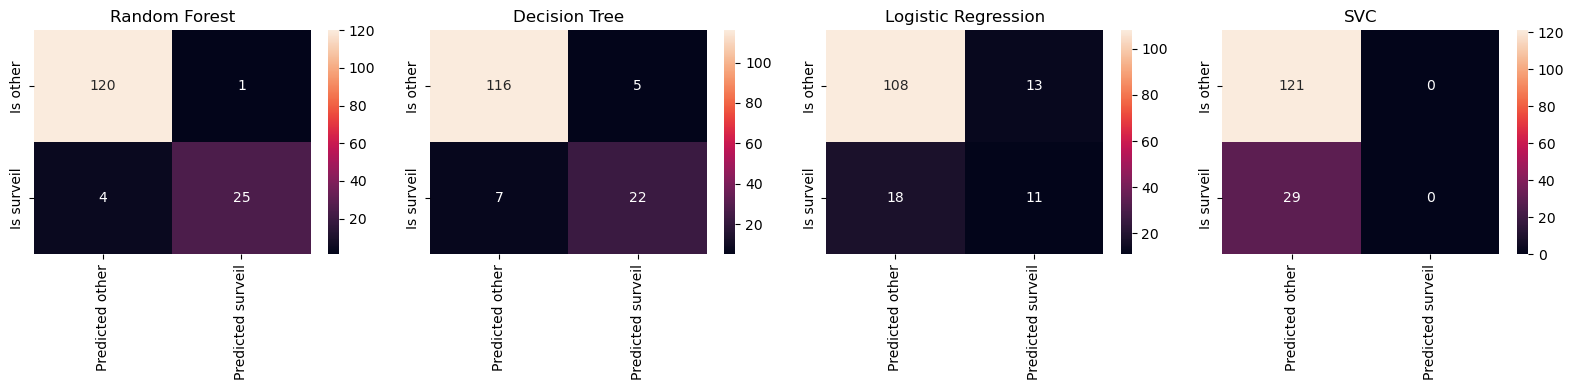

In [521]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(1, len(modelos), figsize=(16, 4))  # Ajusta el tamaño de la figura según la cantidad de modelos

for i, (modelo, clf) in enumerate(modelos.items()):
    y_pred = clf.predict(X_test)
    classes_names = pd.Series(['other', 'surveil'])
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      columns="Predicted " + classes_names, index="Is " + classes_names)

    # Utilizar Seaborn's heatmap en el subgráfico actual
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(modelo)

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()
plt.show()

### RandomForestClassifier

In [522]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=1) 
rf.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier(random_state=1)

In [523]:
from numpy import mean
print("El resultat del model RandomForest sense aplicar CrossValidation és:",
      rf.score(X_test.values, y_test.values.ravel()))

El resultat del model RandomForest sense aplicar CrossValidation és: 0.9666666666666667


In [524]:
rf_noentr = RandomForestClassifier()
rf_cv = cross_val_score(rf_noentr, X_train.values, y_train.values.ravel())
rf_cv

array([0.93333333, 0.93333333, 0.91011236, 0.98876404, 0.97752809])

In [525]:
from numpy import mean
print("El resultat del model RandomForest aplicant CrossValidation és:",
      mean(rf_cv))

El resultat del model RandomForest aplicant CrossValidation és: 0.948614232209738


## 2. El meu dataset per a fer prediccions

In [32]:
import pandas as pd

# Lista de nombres de los archivos CSV
archivos_csv = ["states_2022-06-27-11.csv", "states_2022-06-27-12.csv", "states_2022-06-27-13.csv", "states_2022-06-27-14.csv", "states_2022-06-27-15.csv", "states_2022-06-27-16.csv", "states_2022-06-27-17.csv", "states_2022-06-27-18.csv", "states_2022-06-27-19.csv"]

# Crear una lista de DataFrames cargados desde los archivos CSV
dataframes = [pd.read_csv(archivo) for archivo in archivos_csv]

# Concatenar los DataFrames en uno solo
df = pd.concat(dataframes, ignore_index=True)

Cada csv conté registres mundials d'avions captats per un radar MODE-S durant un rang d'una hora. El resultat és un dataset de més de 28 milions de registres recollits durant les 6 fins a les 16 del dia 27 de juny del 2022. 


In [33]:
df.columns

Index(['time', 'icao24', 'lat', 'lon', 'velocity', 'heading', 'vertrate',
       'callsign', 'onground', 'alert', 'spi', 'squawk', 'baroaltitude',
       'geoaltitude', 'lastposupdate', 'lastcontact'],
      dtype='object')

In [34]:
df.head()

time  icao24        lat        lon    velocity     heading  vertrate  \
0  1656327600  896459  49.566238   8.049437  231.097613  271.785927       0.0   
1  1656327600  06a2b0  39.597427  23.943448  271.885966  133.083186       0.0   
2  1656327610  43c962        NaN        NaN         NaN         NaN       NaN   
3  1656327610  06a0db  45.417853  11.558823  230.264698  278.220617       0.0   
4  1656327610  400db4  48.729630   0.323533  228.555027  167.653039       0.0   

   callsign  onground  alert    spi  squawk  baroaltitude  geoaltitude  \
0  UAE73        False  False  False   554.0      12192.00     12580.62   
1  QTR68H       False  False  False  1165.0      10668.00     11170.92   
2               False  False  False  6052.0       5615.94          NaN   
3  QTR44L       False  False  False  3234.0      10972.80     11490.96   
4  EZY96VL      False  False  False  2704.0      11277.60     11475.72   

   lastposupdate   lastcontact  
0   1.656328e+09  1.656328e+09  
1   1.656328e+09  1.656328e+09  
2            NaN  1.656328e+09  
3   1.656328e+09  1.656328e+09  
4   1.656328e+09  1.656328e+09

In [35]:
df.shape #Registres d'avions durant 10 hores a tot el món.

(28673740, 16)

In [36]:
lat_min = 24.396308
lat_max = 49.345786
lon_min = -125.000000
lon_max = -66.934570
df_us = df[(df['lat'] >= lat_min) & (df['lat'] <= lat_max) & (df['lon'] >= lon_min) & (df['lon'] <= lon_max)]
df_us.shape #Selecciona només els avions registrats dins el espai aeri americà.

(13902139, 16)

In [215]:
counts = df_us['icao24'].value_counts()

# Seleccionar los 'icao24' con más de 1000 ocurrencias
icao24_mayor_1000 = counts[counts >= 1000].index.tolist()

# Filtrar el DataFrame para incluir solo los registros con 'icao24' en icao24_mayor_1000
sample_df = df_us[df_us['icao24'].isin(icao24_mayor_1000)] 

In [216]:
len(icao24_mayor_1000)

5357

In [217]:
sample_df.shape

(8009927, 16)

In [218]:
sample_df.head()

time  icao24        lat        lon    velocity     heading  \
13  1656327610  a2886c  36.240326 -77.545052  223.498537    8.204706   
15  1656327610  a3b124  40.309909 -83.520501  253.935311   44.179200   
16  1656327610  a25c18  36.667786 -89.837551  126.400472  309.716000   
23  1656327610  abef79  30.710770 -89.862078  221.072695   32.358707   
27  1656327610  a062ec  35.816116 -78.391056  200.770298   61.202070   

    vertrate  callsign  onground  alert    spi  squawk  baroaltitude  \
13   0.00000  SWA2122      False  False  False  3676.0      11277.60   
15   6.82752  EDV5171      False  False  False     NaN       8663.94   
16   0.32512  N251KB       False  False  False     NaN       7924.80   
23   8.77824  SWA2782      False  False  False     NaN       6316.98   
27   9.10336  DAL2347      False  False  False  2462.0       4968.24   

    geoaltitude  lastposupdate   lastcontact  
13     11871.96   1.656328e+09  1.656328e+09  
15      9083.04   1.656328e+09  1.656328e+09  
16      8351.52   1.656328e+09  1.656328e+09  
23      6675.12   1.656328e+09  1.656328e+09  
27      5227.32   1.656328e+09  1.656328e+09

In [219]:
sample_df = sample_df.drop(["vertrate","onground","spi","alert","baroaltitude","lastposupdate","lastcontact"], axis=1)
sample_df.head()
#Elimina les columnes que no són útils

time  icao24        lat        lon    velocity     heading  \
13  1656327610  a2886c  36.240326 -77.545052  223.498537    8.204706   
15  1656327610  a3b124  40.309909 -83.520501  253.935311   44.179200   
16  1656327610  a25c18  36.667786 -89.837551  126.400472  309.716000   
23  1656327610  abef79  30.710770 -89.862078  221.072695   32.358707   
27  1656327610  a062ec  35.816116 -78.391056  200.770298   61.202070   

    callsign  squawk  geoaltitude  
13  SWA2122   3676.0     11871.96  
15  EDV5171      NaN      9083.04  
16  N251KB       NaN      8351.52  
23  SWA2782      NaN      6675.12  
27  DAL2347   2462.0      5227.32

### Crea les columnes firstseen i steering

In [220]:
sample_df = sample_df.sort_values(by = ["icao24","time"])
sample_df.head() #Ordena el df per la columna icao24 i time.
#D'aquesta manera, els registres d'un mateix avió estarán junts i ordenats per temps.

time  icao24        lat        lon    velocity     heading  \
1331   1656327610  010154  46.274094 -69.577488  217.329302  234.052398   
9423   1656327620  010154  46.262962 -69.599556  216.194441  234.002698   
13481  1656327630  010154  46.251231 -69.622833  215.778444  233.922411   
21850  1656327640  010154  46.240198 -69.644669  215.059744  233.952473   
22559  1656327650  010154  46.228700 -69.667397  215.059744  233.952473   

       callsign  squawk  geoaltitude  
1331   MSR995     706.0     11407.14  
9423   MSR995     706.0     11407.14  
13481  MSR995     706.0     11407.14  
21850  MSR995     706.0     11407.14  
22559  MSR995     706.0     11407.14

In [221]:
# Usar groupby per agrupar per 'icao24' y després aplicar transform per obtenir el primer valor de 'time' en cada grup
sample_df['firstseen'] = sample_df.groupby('icao24')['time'].transform('min')
sample_df.head()

sample_df['steering'] = sample_df.groupby(['icao24', 'firstseen']).heading.diff()
sample_df.head() 
#Calcula el rumb de l'avió. A partir de l'última posició de l'aeronau es calcula el canvi de rumb en graus.

time  icao24        lat        lon    velocity     heading  \
1331   1656327610  010154  46.274094 -69.577488  217.329302  234.052398   
9423   1656327620  010154  46.262962 -69.599556  216.194441  234.002698   
13481  1656327630  010154  46.251231 -69.622833  215.778444  233.922411   
21850  1656327640  010154  46.240198 -69.644669  215.059744  233.952473   
22559  1656327650  010154  46.228700 -69.667397  215.059744  233.952473   

       callsign  squawk  geoaltitude   firstseen  steering  
1331   MSR995     706.0     11407.14  1656327610       NaN  
9423   MSR995     706.0     11407.14  1656327610 -0.049700  
13481  MSR995     706.0     11407.14  1656327610 -0.080287  
21850  MSR995     706.0     11407.14  1656327610  0.030062  
22559  MSR995     706.0     11407.14  1656327610  0.000000

Aquestes dos columnes les necessitaré més endavant per calcular el rumb de l'aeronau. 

In [222]:
sample_df.isnull().sum()

time                 0
icao24               0
lat                  0
lon                  0
velocity        145005
heading         145005
callsign         73556
squawk         2972070
geoaltitude     272099
firstseen            0
steering        152454
dtype: int64

Velocity i heading están relacionades, quan l'avió no retorna la seva direcció tampoc la seva velocitat. La geoaltitude també té molts valors nans. 

El steering està relacionat amb el heading ja que es calcula a partir d'aquest. Si el heading és null, el steering també ho serà. Els 329 valors Nan que resten corresponen al nombre d'avions en el dataset. Això ens fa pensar que per a cada primer registre d'una aeronau, el seu valor en steering serà NaN ja que no té cap referència anterior. Aquests 329 valors els convertiré a 0.


El callsign no l'utilitzaré per fer les prediccions, per tant es pot quedar com està. 

In [223]:
sample_df[["velocity","heading",
           "geoaltitude"]] = sample_df[["velocity","heading","geoaltitude"]].interpolate()

In [224]:
sample_df[["velocity","heading","geoaltitude","steering"]].isnull().sum()

velocity            0
heading             0
geoaltitude         0
steering       152454
dtype: int64

In [225]:
sample_df['steering']
steerings = sample_df.groupby(['icao24', 'firstseen']).heading.diff()
steerings = steerings.apply(lambda direction: direction if direction <= 180 else direction - 360)
steerings = steerings.apply(lambda direction: direction if direction >= -180 else direction + 360)

sample_df['steering'] = steerings
#Torna a calcular el steering 

In [226]:
sample_df.head()

time  icao24        lat        lon    velocity     heading  \
1331   1656327610  010154  46.274094 -69.577488  217.329302  234.052398   
9423   1656327620  010154  46.262962 -69.599556  216.194441  234.002698   
13481  1656327630  010154  46.251231 -69.622833  215.778444  233.922411   
21850  1656327640  010154  46.240198 -69.644669  215.059744  233.952473   
22559  1656327650  010154  46.228700 -69.667397  215.059744  233.952473   

       callsign  squawk  geoaltitude   firstseen  steering  
1331   MSR995     706.0     11407.14  1656327610       NaN  
9423   MSR995     706.0     11407.14  1656327610 -0.049700  
13481  MSR995     706.0     11407.14  1656327610 -0.080287  
21850  MSR995     706.0     11407.14  1656327610  0.030062  
22559  MSR995     706.0     11407.14  1656327610  0.000000

In [227]:
sample_df[["velocity","heading","geoaltitude","steering"]].isnull().sum()
#Ara ja no té tants valors nuls.

velocity          0
heading           0
geoaltitude       0
steering       5357
dtype: int64

In [228]:
sample_df[["steering"]] = sample_df[["steering"]].fillna(0)

In [229]:
sample_df[["velocity","heading","geoaltitude","steering"]].isnull().sum()

velocity       0
heading        0
geoaltitude    0
steering       0
dtype: int64

In [526]:
sample_df.columns

Index(['time', 'icao24', 'lat', 'lon', 'velocity', 'heading', 'callsign',
       'squawk', 'geoaltitude', 'firstseen', 'steering'],
      dtype='object')

### Calculant altituts per a cada avió

In [230]:
# Faig una llista de les altituds per a cadascun dels registres de sample_df
altitudes = sample_df.set_index('icao24').geoaltitude
altitudes.shape[0]

8009927

In [231]:
# Calculate quantiles from the sample and calculate each plane's behavior
quantiles = altitudes.quantile([0.2, 0.4, 0.6, 0.8])

In [232]:
import numpy as np
bin_quantiles = [-np.inf, *quantiles, np.inf]
bin_labels = ['altitude1','altitude2','altitude3','altitude4','altitude5']

In [233]:
binned = pd.cut(altitudes,
                bins=bin_quantiles,
                labels=bin_labels)

In [234]:
altitude_features = binned.groupby(['icao24']).value_counts(normalize=True).unstack(fill_value=0) * 100
altitude_features.head()

geoaltitude  altitude1  altitude2  altitude3  altitude4  altitude5
icao24                                                            
010154       64.677575   6.448508  15.014437  13.859480   0.000000
04004a        7.906977  10.498339   9.568106  30.099668  41.926910
06a2e2       11.382114  13.008130  10.840108  33.152665  31.616983
0d06d3        0.000000  15.027322   7.832423  13.752277  63.387978
0d0707        7.519884   7.447578   5.567607  21.185828  58.279103

<Axes: >

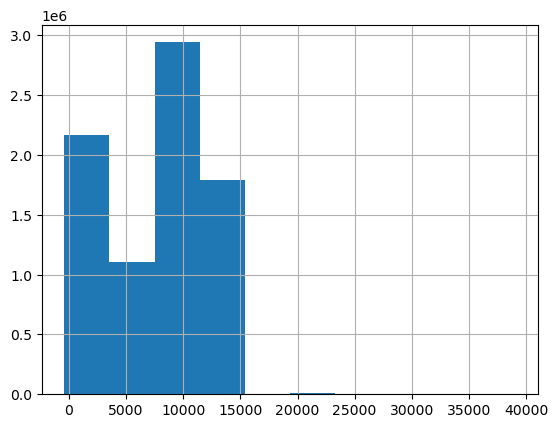

In [235]:
altitudes.hist()

### Calcula velocitat per a cada avió

In [236]:
# Faig una llista de les velocitats per a cadascun dels registres de sample_df
speed = sample_df.set_index('icao24').velocity
speed.shape[0]

8009927

In [237]:
# Calculate quantiles from the sample and calculate each plane's behavior
quantiles2 = speed.quantile([0.2, 0.4, 0.6, 0.8])

In [238]:
import numpy as np #Importa la llibreia numpy
bin_quantiles2 = [-np.inf, *quantiles2, np.inf]
bin_labels2 = ['speed1','speed2','speed3','speed4','speed5']

In [239]:
binned2 = pd.cut(speed,
                bins=bin_quantiles2,
                labels=bin_labels2)

In [240]:
speed_features = binned2.groupby(['icao24']).value_counts(normalize=True).unstack(fill_value=0) * 100
speed_features.head()

velocity     speed1     speed2     speed3     speed4     speed5
icao24                                                         
010154    63.618864   5.919153  17.709336   1.299326  11.453321
04004a     5.315615  14.750831  37.342193   6.378738  36.212625
06a2e2     9.756098   9.033424   5.420054  34.327010  41.463415
0d06d3     3.278689   9.198543  18.761384  64.207650   4.553734
0d0707     5.856833   8.966016   3.832249  53.723789  27.621114

<Axes: >

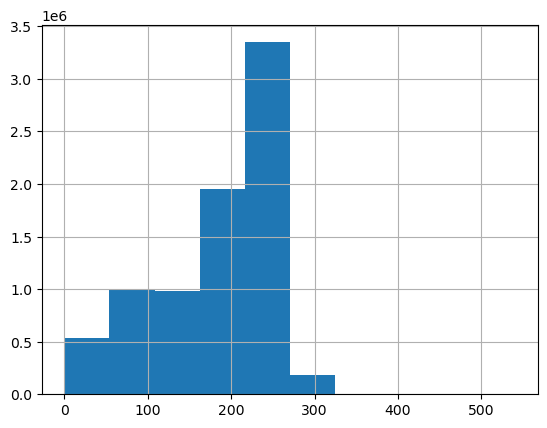

In [241]:
speed.hist()

### Calcula el rumb per a cada avió

In [242]:
steerings = sample_df.set_index('icao24').steering 

quantiles3 = [-25, -10, -1, 0, 1, 22, 45]

bin_quantiles3 = [-np.inf, *quantiles3, np.inf]
bin_labels3 = ['steer1','steer2','steer3','steer4','steer5', 'steer6', 'steer7', 'steer8']

binned3 = pd.cut(steerings,
                bins=bin_quantiles3,
                labels=bin_labels3)

steer_features3 = binned3.groupby(['icao24']).value_counts(normalize=True).unstack(fill_value=0) * 100
steer_features3.head()

steering    steer1    steer2    steer3     steer4     steer5    steer6  \
icao24                                                                   
010154    0.096246  0.336862  1.347449  49.855630  45.765159  2.454283   
04004a    0.000000  0.132890  2.059801  67.574751  27.308970  2.724252   
06a2e2    0.000000  1.445348  3.884372  67.841012  24.841915  1.987353   
0d06d3    0.091075  0.000000  1.730419  69.489982  27.049180  1.639344   
0d0707    0.072307  0.723066  2.313811  73.680405  21.547361  1.590745   

steering    steer7    steer8  
icao24                        
010154    0.096246  0.048123  
04004a    0.199336  0.000000  
06a2e2    0.000000  0.000000  
0d06d3    0.000000  0.000000  
0d0707    0.000000  0.072307

<Axes: >

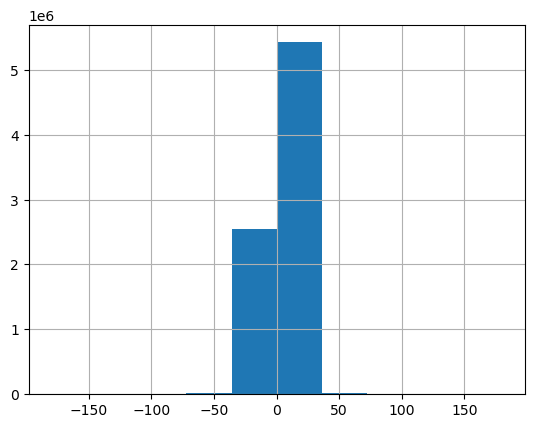

In [243]:
steerings.hist()

### Calcula l'àrea per a cada avió

In [244]:
coords = sample_df.groupby(['icao24', 'firstseen']).agg({
    'lat': ['min', 'max'],
    'lon': ['min', 'max']
}).reset_index(level=1, drop=True)
coords.head()

lat                    lon            
              min        max         min         max
icao24                                              
010154  43.277115  48.874237  -79.852848  -69.577488
04004a  41.965118  49.315206  -88.013263  -68.908635
06a2e2  28.489334  45.330688 -118.559745 -104.909036
0d06d3  30.537323  40.895582 -112.501099 -110.207466
0d0707  27.897965  37.710526 -122.558860 -110.931068

In [245]:
from pyproj import Transformer
from shapely.geometry import Polygon
#Conversió de coordenades
transformer = Transformer.from_crs('epsg:4326', 'epsg:3857')

#Per cada registre aplica la funció get_area
#Aquesta transforma les coordenades en una forma de polígon i calcula l'àrea que ha recorregut cada avió
#També retorna l'àrea en km2.
def get_area(row):
    coords_y = [
        row['lon']['min'],
        row['lon']['max'],
        row['lon']['max'],
        row['lon']['min'],
    ]
    coords_x = [
        row['lat']['max'],
        row['lat']['max'],
        row['lat']['min'],
        row['lat']['min'],
    ]

    # This is so much faster than going the shapely route
    # but also slower than it used to be?
    lon, lat = transformer.transform(coords_x, coords_y)
    square_m = Polygon(zip(lon, lat)).area
    square_km = square_m / (1000 * 1000)
    return square_km

areas = coords.apply(get_area, axis=1)#Aplica per la funció per cada registre
areas.head()

icao24
010154    1.028664e+06
04004a    2.494129e+06
06a2e2    3.590675e+06
0d06d3    3.636215e+05
0d0707    1.685953e+06
dtype: float64

In [246]:
# Calculate quantiles from the sample and calculate each plane's behavior
quantiles4 = areas.quantile([0.2, 0.4, 0.6, 0.8])

bin_quantiles4 = [-np.inf, *quantiles4, np.inf]
bin_labels4 = ['boxes1','boxes2','boxes3','boxes4','boxes5']

binned4 = pd.cut(areas,
                bins=bin_quantiles4,
                labels=bin_labels4)

area_features = binned4.groupby(['icao24']).value_counts(normalize=True).unstack(fill_value=0) * 100
area_features.head()

boxes1  boxes2  boxes3  boxes4  boxes5
icao24                                        
010154     0.0   100.0     0.0     0.0     0.0
04004a     0.0     0.0     0.0   100.0     0.0
06a2e2     0.0     0.0     0.0     0.0   100.0
0d06d3   100.0     0.0     0.0     0.0     0.0
0d0707     0.0     0.0   100.0     0.0     0.0

<Axes: >

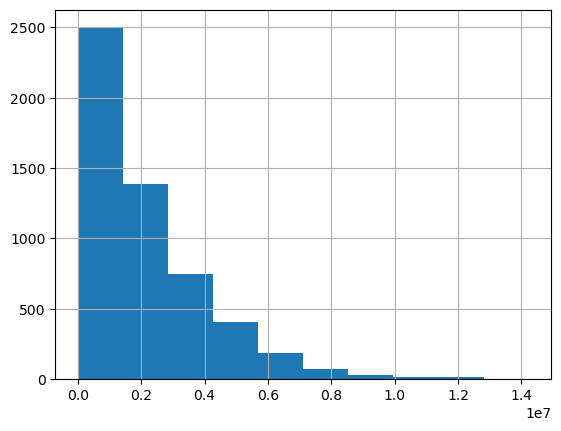

In [247]:
areas.hist()

### Calcula el squawk code per a cada avió 

Aquesta columna ja existeix, però vull agafar el codi que mes cops es repeteix per a cada avió. Vull aconseguir que en comptes de tenir més d'un codi asociat, tingui només un.

In [248]:
sample_df.columns

Index(['time', 'icao24', 'lat', 'lon', 'velocity', 'heading', 'callsign',
       'squawk', 'geoaltitude', 'firstseen', 'steering'],
      dtype='object')

In [249]:
def defmoda(series):
    moda = series.mode()
    
    if moda.empty or pd.isna(moda.iloc[0]):
        # Si la moda es NaN o no hay moda, toma el siguiente valor más frecuente si existe
        value_counts = series.value_counts()
        if not value_counts.empty:
            siguiente_mas_frecuente = value_counts.idxmax()
            return siguiente_mas_frecuente
        else:
            return None
    else:
        return moda.iloc[0]

# Calcula la moda o el siguiente valor más frecuente para cada grupo de 'icao24'
modaxgrup = sample_df.groupby('icao24')['squawk'].agg(defmoda).fillna(0)
modaxgrup.head()

icao24
010154     706.0
04004a    7267.0
06a2e2    3274.0
0d06d3     505.0
0d0707    3271.0
Name: squawk, dtype: float64

In [250]:
squawk = pd.DataFrame(modaxgrup, columns=['squawk'])
squawk.head()

squawk
icao24        
010154   706.0
04004a  7267.0
06a2e2  3274.0
0d06d3   505.0
0d0707  3271.0

### Calcula les observacions per a cada avió

In [251]:
count_features = sample_df.groupby('icao24').size().to_frame(name='observations')
count_features.head()

observations
icao24              
010154          2078
04004a          1505
06a2e2          1107
0d06d3          1098
0d0707          1383

### Ajunta totes les característiques en un mateix dataset

In [490]:
features = pd.concat([
    area_features,
    speed_features,
    altitude_features,
    steer_features3,
    squawk,
    count_features,
], axis=1, sort=False)
features.head(2)

boxes1  boxes2  boxes3  boxes4  boxes5     speed1     speed2  \
icao24                                                                 
010154     0.0   100.0     0.0     0.0     0.0  63.618864   5.919153   
04004a     0.0     0.0     0.0   100.0     0.0   5.315615  14.750831   

           speed3    speed4     speed5  ...    steer1    steer2    steer3  \
icao24                                  ...                                 
010154  17.709336  1.299326  11.453321  ...  0.096246  0.336862  1.347449   
04004a  37.342193  6.378738  36.212625  ...  0.000000  0.132890  2.059801   

           steer4     steer5    steer6    steer7    steer8  squawk  \
icao24                                                               
010154  49.855630  45.765159  2.454283  0.096246  0.048123   706.0   
04004a  67.574751  27.308970  2.724252  0.199336  0.000000  7267.0   

        observations  
icao24                
010154          2078  
04004a          1505  

[2 rows x 25 columns]

In [491]:
#Tornar a fer una columna amb els codis icao24
features = features.reset_index().rename(columns={ 'index': 'icao24'})
features.icao24 = features.icao24.str.upper() #En mayusculas
features.head()

icao24  boxes1  boxes2  boxes3  boxes4  boxes5     speed1     speed2  \
0  010154     0.0   100.0     0.0     0.0     0.0  63.618864   5.919153   
1  04004A     0.0     0.0     0.0   100.0     0.0   5.315615  14.750831   
2  06A2E2     0.0     0.0     0.0     0.0   100.0   9.756098   9.033424   
3  0D06D3   100.0     0.0     0.0     0.0     0.0   3.278689   9.198543   
4  0D0707     0.0     0.0   100.0     0.0     0.0   5.856833   8.966016   

      speed3     speed4  ...    steer1    steer2    steer3     steer4  \
0  17.709336   1.299326  ...  0.096246  0.336862  1.347449  49.855630   
1  37.342193   6.378738  ...  0.000000  0.132890  2.059801  67.574751   
2   5.420054  34.327010  ...  0.000000  1.445348  3.884372  67.841012   
3  18.761384  64.207650  ...  0.091075  0.000000  1.730419  69.489982   
4   3.832249  53.723789  ...  0.072307  0.723066  2.313811  73.680405   

      steer5    steer6    steer7    steer8  squawk  observations  
0  45.765159  2.454283  0.096246  0.048123   706.0          2078  
1  27.308970  2.724252  0.199336  0.000000  7267.0          1505  
2  24.841915  1.987353  0.000000  0.000000  3274.0          1107  
3  27.049180  1.639344  0.000000  0.000000   505.0          1098  
4  21.547361  1.590745  0.000000  0.072307  3271.0          1383  

[5 rows x 26 columns]

In [496]:
features.columns # Columnes features

Index(['icao24', 'boxes1', 'boxes2', 'boxes3', 'boxes4', 'boxes5', 'speed1',
       'speed2', 'speed3', 'speed4', 'speed5', 'altitude1', 'altitude2',
       'altitude3', 'altitude4', 'altitude5', 'steer1', 'steer2', 'steer3',
       'steer4', 'steer5', 'steer6', 'steer7', 'steer8', 'squawk',
       'observations'],
      dtype='object')

In [493]:
dff_final.columns

Index(['adshex', 'target', 'boxes1', 'boxes2', 'boxes3', 'boxes4', 'boxes5',
       'speed1', 'speed2', 'speed3', 'speed4', 'speed5', 'altitude1',
       'altitude2', 'altitude3', 'altitude4', 'altitude5', 'steer1', 'steer2',
       'steer3', 'steer4', 'steer5', 'steer6', 'steer7', 'steer8', 'squawk_1',
       'observations'],
      dtype='object')

## 3. Prediccions reals

In [506]:
X = features.drop(columns=['icao24'])
features['predicted'] = rf.predict(X)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [507]:
features[features["predicted"]==1].icao24.count()

3696

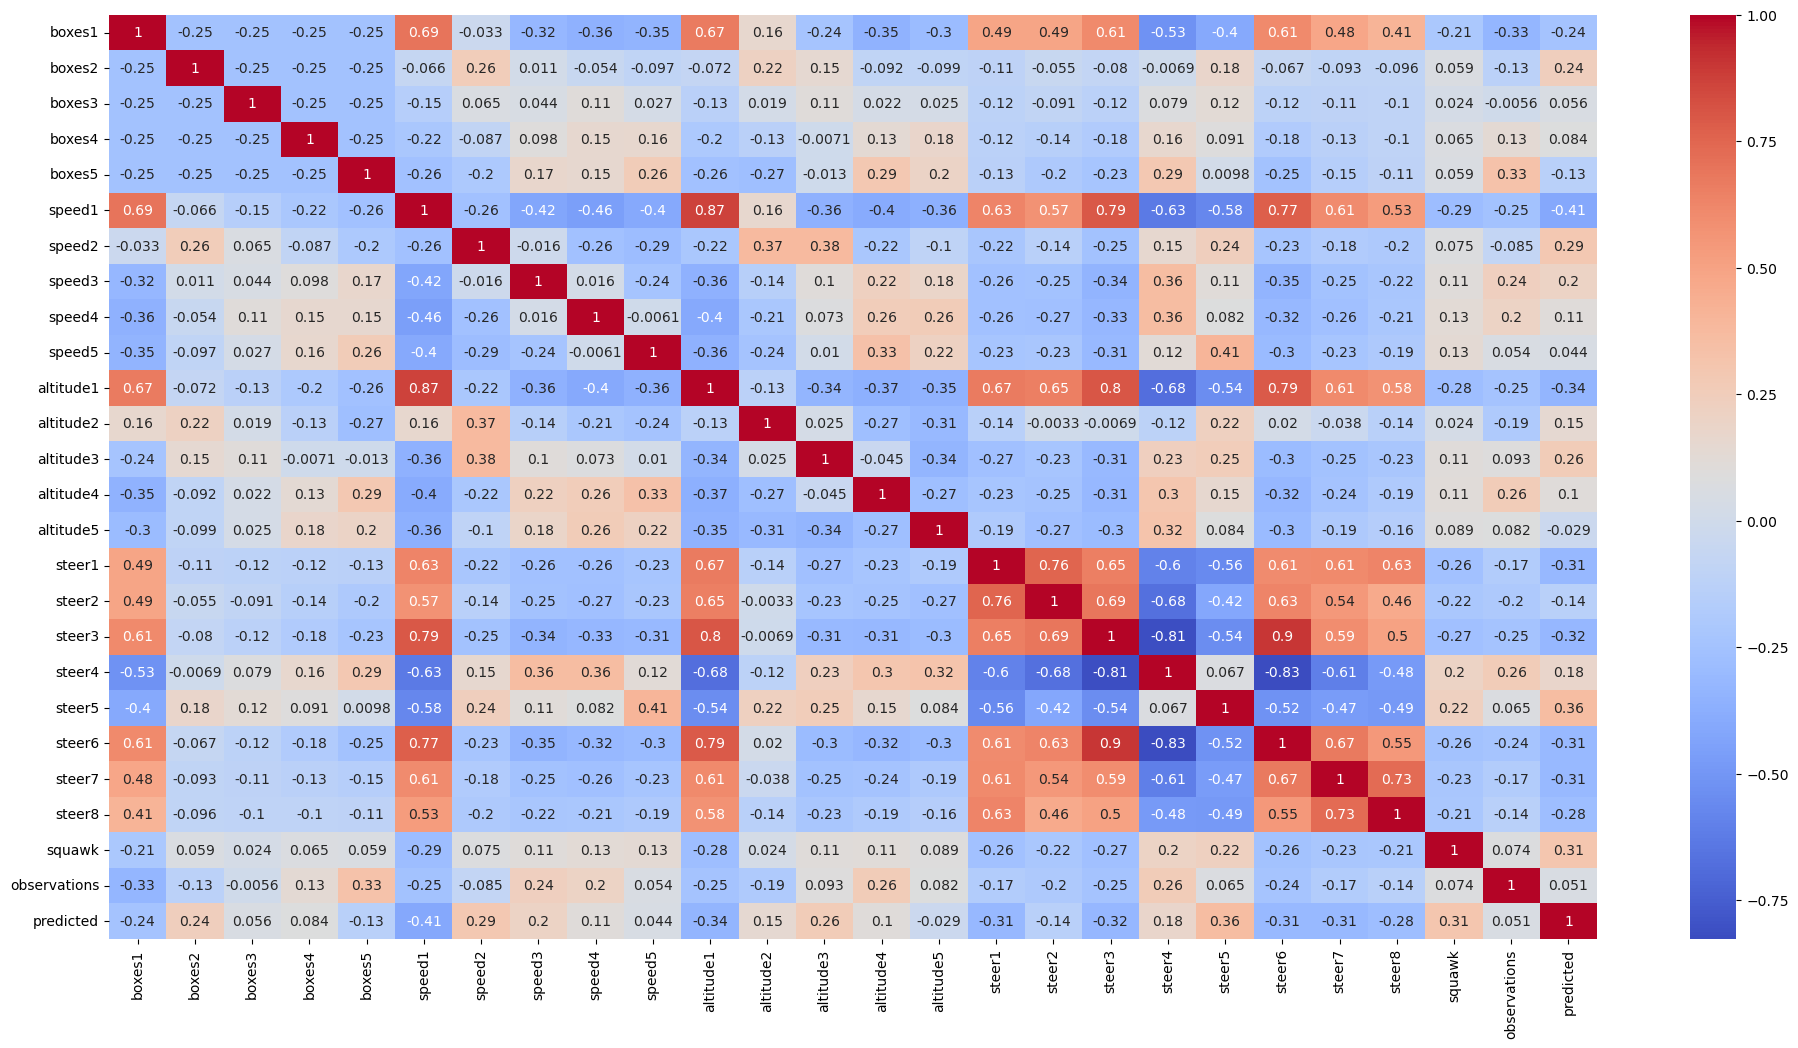

In [508]:
cor = features.iloc[:, 1:].corr()
plt.figure(figsize=(24,12))
sns.heatmap(cor, cmap='coolwarm', annot=True)
plt.show()

## 4. Prediccions amb dataset preparat

Utilitzaré el dataset de buzzfeed un altre cop per entrenar el model. Aquesta vegada utilitzaré totes les columnes que ens proporcionen. Per fer les prediccions utilitzaré aquells registres amb variable target no coneguda. 

In [159]:
df_final2.head() #Dataset per entrenar el model

adshex  target  duration1  duration2  duration3  duration4  duration5  \
2    A00002       0   0.517241   0.103448   0.103448   0.103448   0.172414   
29   A00220       0   0.000000   0.254902   0.176471   0.313725   0.254902   
55   A0041E       0   0.142857   0.285714   0.000000   0.571429   0.000000   
122  A00889       0   0.000000   0.120000   0.200000   0.080000   0.600000   
124  A008BE       0   0.000000   0.300000   0.200000   0.200000   0.300000   

       boxes1    boxes2    boxes3  ...    steer3    steer4    steer5  \
2    0.862069  0.137931  0.000000  ...  0.174954  0.244015  0.034070   
29   0.058824  0.372549  0.294118  ...  0.263342  0.375998  0.132030   
55   0.285714  0.142857  0.285714  ...  0.108597  0.657617  0.090498   
122  0.000000  0.200000  0.120000  ...  0.078782  0.814361  0.065339   
124  0.000000  0.300000  0.200000  ...  0.250704  0.436620  0.092958   

       steer6    steer7    steer8  flights  squawk_1  observations  type  
2    0.202578  0.021179  0.068140       29         0          1086  SHIP  
29   0.120011  0.008611  0.006906       51         0         11149  RV10  
55   0.078431  0.010558  0.019608        7         0           663  SR22  
122  0.023907  0.001276  0.001702       25      7760         11754  SR22  
124  0.145070  0.001408  0.009859       10      1200           710  PA24  

[5 rows x 34 columns]

In [169]:
df_final2.shape

(597, 35)

In [160]:
df_final2.type.unique()

array(['SHIP', 'RV10', 'SR22', 'PA24', 'C182', 'P28A', 'EA50', 'S22T',
       'COL4', 'COL3', 'PA32', 'E45X', 'AC11', 'unknown', 'BE9L', 'SR20',
       'C172', 'T206', 'C501', 'C208', 'BE33', 'P46T', 'BE36', 'DA40',
       'C337', 'PA34', 'LJ45', 'P8', 'C210', 'C414', 'BE20', 'C55B',
       'M20T', 'BE35', 'ULAC', 'C206', 'BE9T', 'BE99', 'RV9', 'FA50',
       'BE60', 'ZZZZ', 'AS50', 'M20P', 'PA27', 'T210', 'C425', 'P32R',
       'P210', 'C310', 'BE58', 'LEG2', 'CL60', 'RV7', 'P32T', 'L39',
       'C240', 'PA46', 'C441', 'BE95', 'C82S', 'PA44', 'GLID', 'C402',
       'PA31', 'RV12', 'P28R', 'C177', 'C421', 'SF34', 'SW3', 'EC35',
       'AC90', 'C340', 'PC12', 'E55P', 'B407', 'DH8B', 'PA18', 'DA42',
       'B412', 'J328', 'TBM8', 'DV20', 'B427', 'DH8D', 'PAY1', 'R44',
       'PAY2', 'AA5', 'EPIC', 'BE55', 'TB20', 'E300', 'C500', 'S92',
       'C77R', 'H500', 'GLF5', 'A139', 'B350', 'CL30', 'B06', 'SBR1',
       'DH8C', 'GLF6', 'C750', 'C680', 'RV6', 'B55', 'H25B', 'TBM7',
       'GLAS', 

In [164]:
df_final2.type = df_final2.type.astype('category') #Categoritza els tipus d'avió
df_final2.type.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\540721039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2.type = df_final2.type.astype('category') #Categoritza els tipus d'avió


2      SHIP
29     RV10
55     SR22
122    SR22
124    PA24
Name: type, dtype: category
Categories (133, object): ['A139', 'AA5', 'AC11', 'AC90', ..., 'ULAC', 'WW24', 'ZZZZ', 'unknown']

In [165]:
df_final2['type_code'] = df_final2.type.cat.codes
df_final2[['type', 'type_code']].head(10)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\2161490041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2['type_code'] = df_final2.type.cat.codes


type  type_code
2    SHIP        119
29   RV10        108
55   SR22        121
122  SR22        121
124  PA24         97
155  C182         28
245  P28A         90
249  EA50         68
253  S22T        113
283  C182         28

In [318]:
X = df_final2.drop(["adshex","type","target"], axis=1)
y= df_final2[["target"]]

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(447, 32) (150, 32) (447, 1) (150, 1)


In [320]:
rf2 = RandomForestClassifier(random_state=2) 
rf2.fit(X_train.values, y_train.values.ravel()) # Entrena el model.
#.ravel serveix per ajustar la forma de la llista.

RandomForestClassifier(random_state=2)

In [340]:
df_pred = df_final[df_final["target"].isna()] #Agafa els registres que tenene Nan a la columna target
df_pred.head()

adshex  target  duration1  duration2  duration3  duration4  duration5  \
0       A     NaN   0.120253   0.075949   0.183544   0.335443   0.284810   
1  A00000     NaN   0.211735   0.155612   0.181122   0.198980   0.252551   
3  A00008     NaN   0.125000   0.041667   0.208333   0.166667   0.458333   
4  A0001E     NaN   0.100000   0.200000   0.200000   0.400000   0.100000   
5  A0002B     NaN   0.166667   0.166667   0.000000   0.666667   0.000000   

     boxes1    boxes2    boxes3  ...    steer4    steer5    steer6    steer7  \
0  0.088608  0.044304  0.069620  ...  0.344090  0.097317  0.186651  0.011379   
1  0.204082  0.183673  0.168367  ...  0.356314  0.116116  0.159325  0.012828   
3  0.125000  0.083333  0.125000  ...  0.380515  0.094669  0.182904  0.014706   
4  0.100000  0.000000  0.100000  ...  0.326984  0.112698  0.206349  0.012698   
5  0.333333  0.000000  0.000000  ...  0.416139  0.112342  0.169304  0.001582   

     steer8  flights  squawk_1  observations  type  type_code  
0  0.009426      158         0         11776  GRND        248  
1  0.013628      392         0         52465  TBM7        431  
3  0.020221       24         0          2176  PA46        350  
4  0.011111       10      1135           630  C56X        126  
5  0.001582        6      2356           632  C82S        133  

[5 rows x 35 columns]

In [341]:
df_pred.shape


(19202, 35)

In [342]:
df_pred.type.unique()

['GRND', 'TBM7', 'PA46', 'C56X', 'C82S', ..., 'H47', 'AS32', '208', 'MG17', 'TVL4']
Length: 452
Categories (455, object): ['208', 'A109', 'A119', 'A139', ..., 'WW24', 'XL2', 'ZZZZ', 'unknown']

In [343]:
df_pred.type = df_pred.type.astype('category') #Categoritza els tipus d'avió
df_pred.type.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\2979737909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred.type = df_pred.type.astype('category') #Categoritza els tipus d'avió


0    GRND
1    TBM7
3    PA46
4    C56X
5    C82S
Name: type, dtype: category
Categories (455, object): ['208', 'A109', 'A119', 'A139', ..., 'WW24', 'XL2', 'ZZZZ', 'unknown']

In [344]:
df_pred['type_code'] = df_pred.type.cat.codes
df_pred[['type', 'type_code']].head(10)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\152081194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['type_code'] = df_pred.type.cat.codes


type  type_code
0      GRND        248
1      TBM7        431
3      PA46        350
4      C56X        126
5      C82S        133
6      PC12        356
7       R66        369
8      DA42        164
9      BE36         54
10  unknown        454

In [345]:
df_final2.shape

(597, 35)

In [346]:
X2 = df_pred.drop(columns=['adshex',"type","target"])
df_pred['predicted'] = rf2.predict(X2) #Crea una columna amb las prediccions de cada registre
#df_pred["predicted_prob"] = tree2.predict_proba(X2) #Crea una columna amb els percentatges de que sigui surveil

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\2616472402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predicted'] = rf2.predict(X2) #Crea una columna amb las prediccions de cada registre


In [347]:
df_pred.head()

adshex  target  duration1  duration2  duration3  duration4  duration5  \
0       A     NaN   0.120253   0.075949   0.183544   0.335443   0.284810   
1  A00000     NaN   0.211735   0.155612   0.181122   0.198980   0.252551   
3  A00008     NaN   0.125000   0.041667   0.208333   0.166667   0.458333   
4  A0001E     NaN   0.100000   0.200000   0.200000   0.400000   0.100000   
5  A0002B     NaN   0.166667   0.166667   0.000000   0.666667   0.000000   

     boxes1    boxes2    boxes3  ...    steer5    steer6    steer7    steer8  \
0  0.088608  0.044304  0.069620  ...  0.097317  0.186651  0.011379  0.009426   
1  0.204082  0.183673  0.168367  ...  0.116116  0.159325  0.012828  0.013628   
3  0.125000  0.083333  0.125000  ...  0.094669  0.182904  0.014706  0.020221   
4  0.100000  0.000000  0.100000  ...  0.112698  0.206349  0.012698  0.011111   
5  0.333333  0.000000  0.000000  ...  0.112342  0.169304  0.001582  0.001582   

   flights  squawk_1  observations  type  type_code  predicted  
0      158         0         11776  GRND        248          0  
1      392         0         52465  TBM7        431          0  
3       24         0          2176  PA46        350          0  
4       10      1135           630  C56X        126          0  
5        6      2356           632  C82S        133          0  

[5 rows x 36 columns]

In [352]:
X3 = df_pred.drop(columns=['adshex',"type","target","predicted"])
df_pred['predicted_prob'] = rf2.predict_proba(X3)[:, 1] #Crea una columna amb las prediccions de cada registre

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7796\3309501772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predicted_prob'] = rf2.predict_proba(X3)[:, 1] #Crea una columna amb las prediccions de cada registre


In [449]:
df_pred.sort_values(by=["predicted_prob"], ascending = False)[["adshex","steer2","predicted_prob"]].head(20)

adshex    steer2  predicted_prob
9889   A63E52  0.219210            0.91
8102   A4FB3C  0.226923            0.90
12036  A7D925  0.315047            0.90
2189   A13098  0.176803            0.87
3112   A1B621  0.173395            0.83
86     A005D8  0.220630            0.82
7353   A497C0  0.204643            0.81
19083  AD68DF  0.266406            0.81
14428  A9AEC1  0.246536            0.79
7696   A4CBEB  0.162667            0.78
19689  ADF7A5  0.310816            0.77
4207   A248EE  0.230457            0.77
14268  A996CB  0.211931            0.76
2299   A144AF  0.248841            0.75
8857   A565E6  0.240377            0.75
8063   A4F784  0.209065            0.74
18349  ACCAE3  0.174263            0.74
16779  AB8123  0.222881            0.73
12144  A7EA6C  0.244518            0.72
18159  ACAE97  0.159635            0.72

Dels 19202 vols registrats, l'algoritme randomforest ha detectat 69 com surveil. Si ens fixem en els que més probabilitat tenen de ser-ho, tots tenen un valor steer2 alt. Té sentit ja que això significa que fan molts de girs. Aquesta era una característica amb molta correlació amb la variable target. 

## 5. Dibuixar rutes amb gmplot

In [434]:
import gmplot
for i in ruta:
    # Centra el mapa en el primer par de coordenadas
    gmap = gmplot.GoogleMapPlotter(i[0], i[1], zoom=6)

    # Dibuja la ruta del avión
    latitudes, longitudes = zip(*ruta)
    gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=10)

# Guarda el mapa en un archivo HTML
gmap.draw("ruta7.html")

In [432]:
ruta = sample_df[sample_df["icao24"]=="A66420"][["lat","lon"]]

In [433]:
ruta = ruta.values.tolist()

La ruta que ha fet aquest avió s'ha guardat a un html. Es tracta d'un mapa de google maps interactiu amb el dibuix de la ruta calculada amb les coordenades.

Ara agafaré els 10 avions amb valor steer2 més alt de features per dibuixar-los i veure el seu comportament. S'espera que aquests avions donin moltes voltes.

In [451]:
suspicious = features.sort_values(by='steer2', ascending=False).head(10) #Llista amb els 10 sospitosos
suspicious 

icao24  boxes1  boxes2  boxes3  boxes4  boxes5      speed1     speed2  \
2830  A7F6E9   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
3521  AA3C4C   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
2532  A6FB51   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
3411  A9E56C   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
1982  A51BC9   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
5227  C052BB   100.0     0.0     0.0     0.0     0.0   46.214852  46.647441   
5100  AE1E67   100.0     0.0     0.0     0.0     0.0   64.819277  35.180723   
2346  A66420   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
2049  A54D64   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   
5231  C0570A   100.0     0.0     0.0     0.0     0.0  100.000000   0.000000   

        speed3    speed4  ...     steer2     steer3     steer4     steer5  \
2830  0.000000  0.000000  ...  22.667910  23.787313   7.182836   4.850746   
3521  0.000000  0.000000  ...  15.831663  27.722111  28.189713   6.412826   
2532  0.000000  0.000000  ...  13.395349  19.534884  26.604651   3.813953   
3411  0.000000  0.000000  ...  11.647255  28.286190  12.146423   4.742097   
1982  0.000000  0.000000  ...  11.393274  24.502402  31.365820   6.726150   
5227  6.993511  0.144196  ...  10.310022  11.319394  31.506849  20.836337   
5100  0.000000  0.000000  ...  10.200803  13.574297  18.634538  11.807229   
2346  0.000000  0.000000  ...  10.061444  16.820276  37.941628   3.456221   
2049  0.000000  0.000000  ...   9.635417  22.048611  28.472222   8.506944   
5231  0.000000  0.000000  ...   9.357798  31.009174  18.715596   7.155963   

         steer6    steer7    steer8  squawk  observations  predicted  
2830   7.555970  0.186567  0.093284     0.0          1072          0  
3521  13.159653  0.601202  0.534402     0.0          1497          0  
2532  22.511628  3.906977  1.395349     0.0          1075          0  
3411  23.544093  1.414309  0.083195  1200.0          1202          0  
1982  15.991764  0.274537  0.617708     0.0          1457          0  
5227  14.708003  5.263158  0.072098  2103.0          1387          1  
5100  19.919679  7.469880  4.337349     0.0          1245          1  
2346  20.890937  4.992320  0.537634  1200.0          1302          0  
2049  23.263889  2.864583  0.954861  6571.0          1152          0  
5231  22.110092  2.660550  0.275229  1200.0          1090          0  

[10 rows x 27 columns]

In [424]:
readings = sample_df[sample_df.icao24.isin(suspicious.icao24.str.lower())]
readings.head() #Busca els 10 sospitosos al dataset sample_df que conté tots els registres.

time  icao24        lat        lon   velocity    heading  \
1652939  1656330000  a51bc9  41.616714 -88.103984  34.340823   8.615648   
1654727  1656330010  a51bc9  41.620401 -88.102623  34.340823   8.615648   
1663213  1656330020  a51bc9  41.623260 -88.101363  36.121150  17.402704   
1674190  1656330030  a51bc9  41.626220 -88.100132  36.442103  18.946505   
1679045  1656330040  a51bc9  41.629618 -88.098471  36.684583  22.249024   

         callsign  squawk  geoaltitude   firstseen  steering  
1652939  N42801       NaN       342.90  1656330000  0.000000  
1654727  N42801       NaN       342.90  1656330000  0.000000  
1663213  N42801       NaN       388.62  1656330000  8.787056  
1674190  N42801       NaN       419.10  1656330000  1.543801  
1679045  N42801       NaN       434.34  1656330000  3.302519

In [425]:
flights = readings.groupby(['firstseen', 'icao24']) #Agrupa per firstseen i per icao24
len(flights) 

10

In [429]:
#Api par introduir el fons de google maps.
import os
import types

import cartopy.io.img_tiles as img_tiles
import requests
import PIL

class CachedTiler(object):
    def __init__(self, tiler):
        self.tiler = tiler

    def __getattr__(self, name):
        attr = getattr(self.tiler, name, None)
        if isinstance(attr, types.MethodType):
            attr = types.MethodType(attr.__func__, self)
        return attr

    def get_image(self, tile):
        tileset_name = '{}'.format(self.tiler.__class__.__name__.lower())
        cache_dir = os.path.expanduser(os.path.join('~/', 'image_tiles', tileset_name))
        if not os.path.exists(cache_dir):
            os.makedirs(cache_dir)
        tile_fname = os.path.join(cache_dir, '_'.join(str(v) for v in tile) + '.png')
        if not os.path.exists(tile_fname):
            response = requests.get(self._image_url(tile),
                                    stream=True)

            with open(tile_fname, "wb") as fh:
                for chunk in response:
                    fh.write(chunk)
        with open(tile_fname, 'rb') as fh:
            img = PIL.Image.open(fh)
            img = img.convert(self.desired_tile_form)     
        return img, self.tileextent(tile), 'lower'

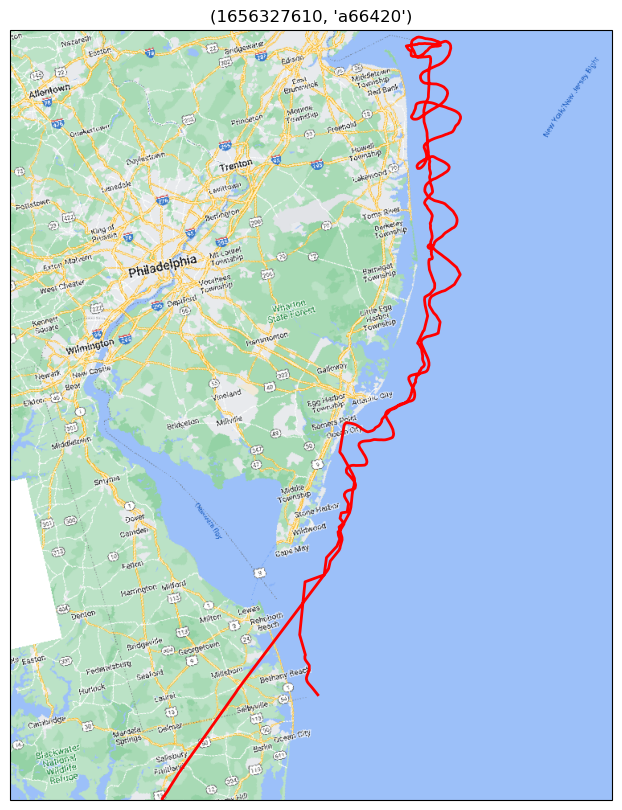

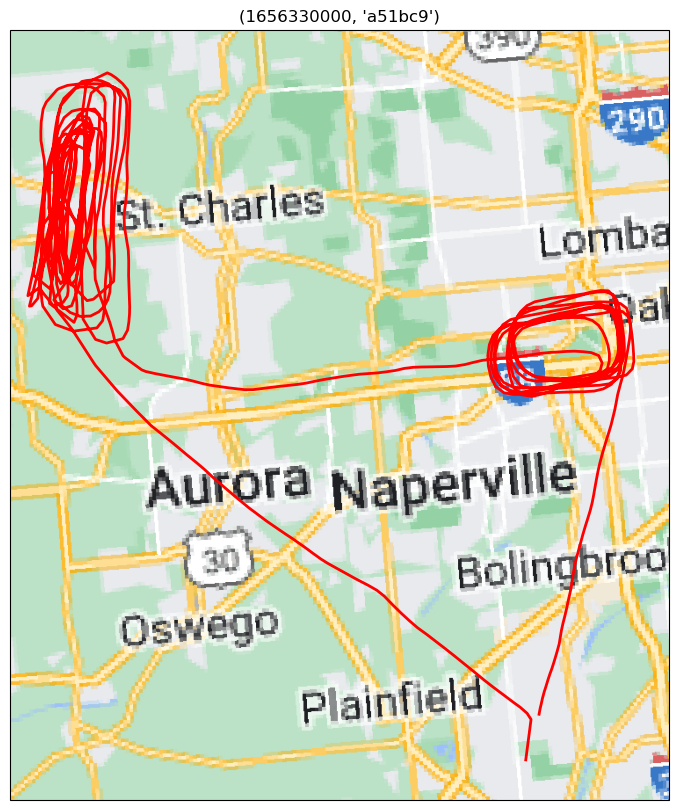

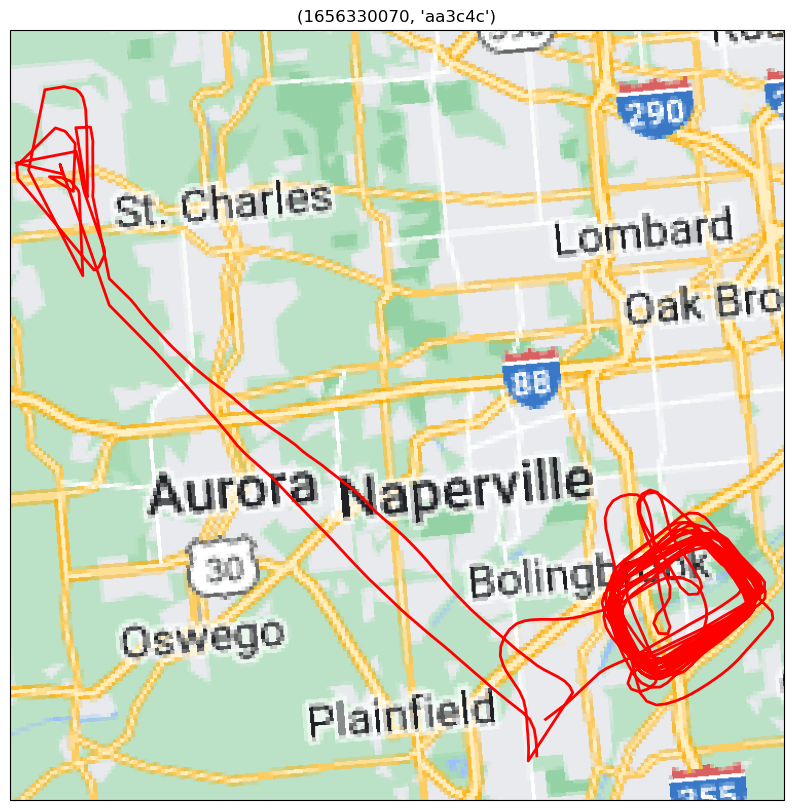

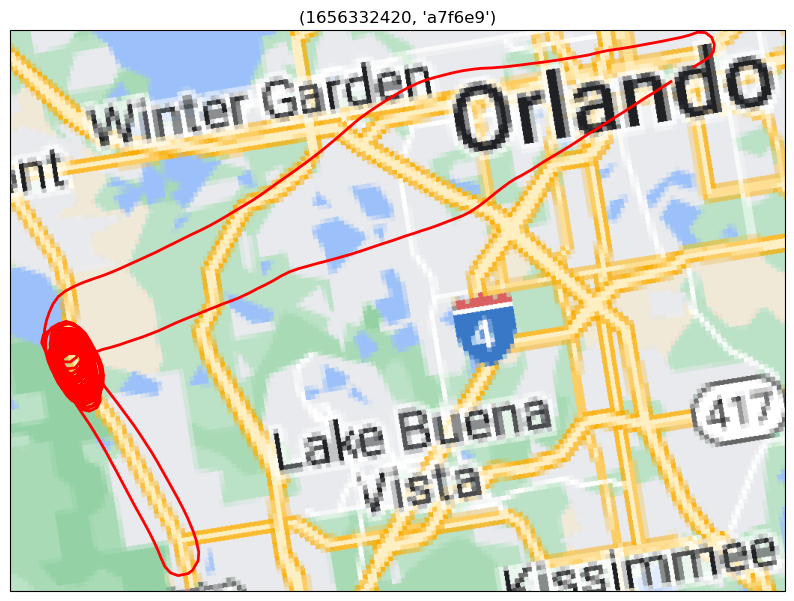

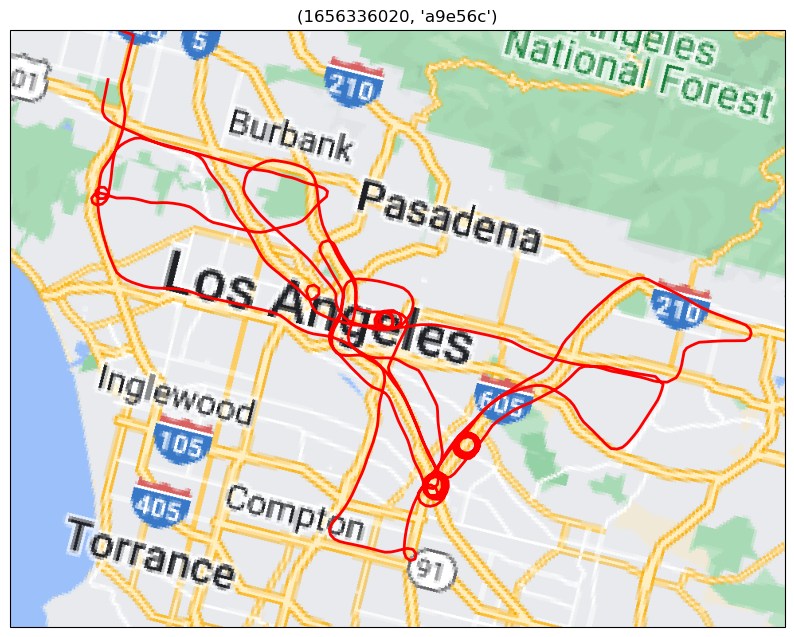

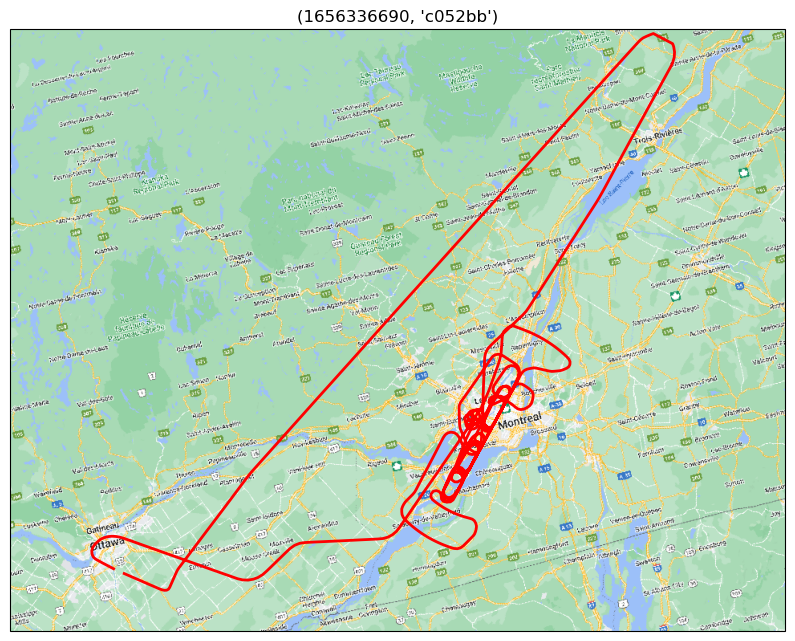

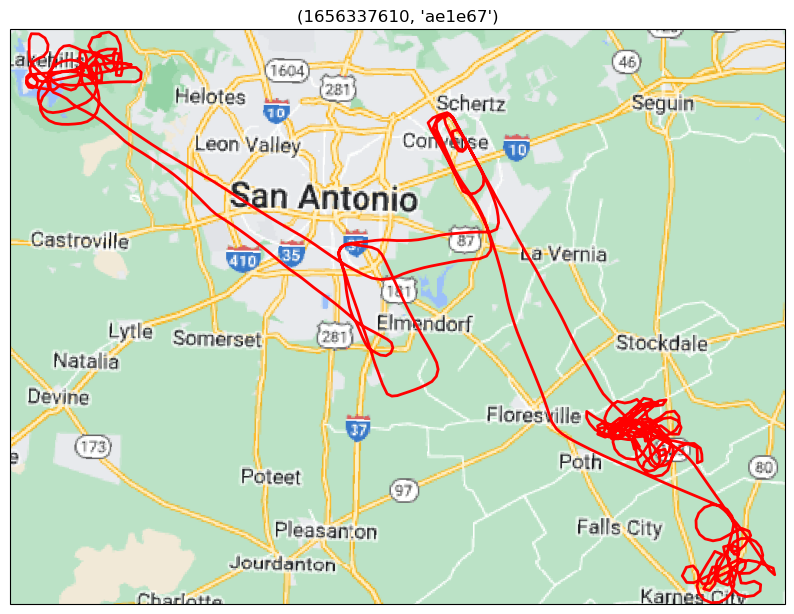

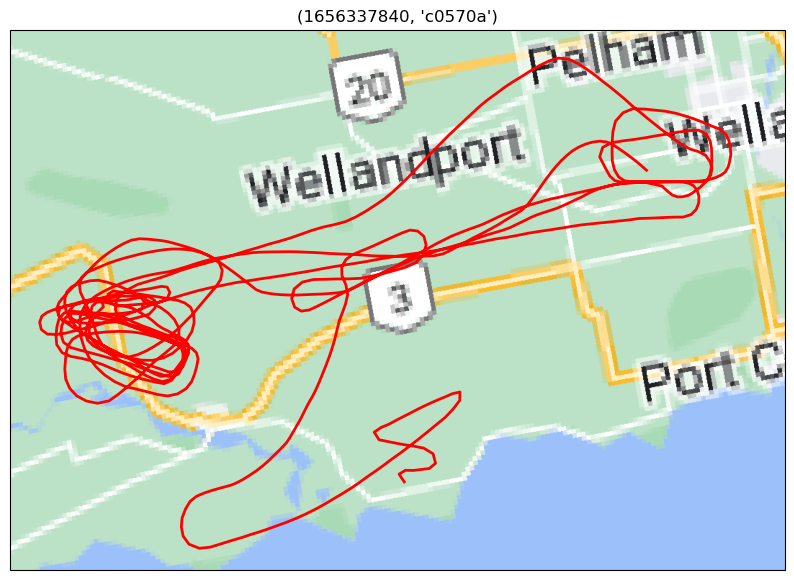

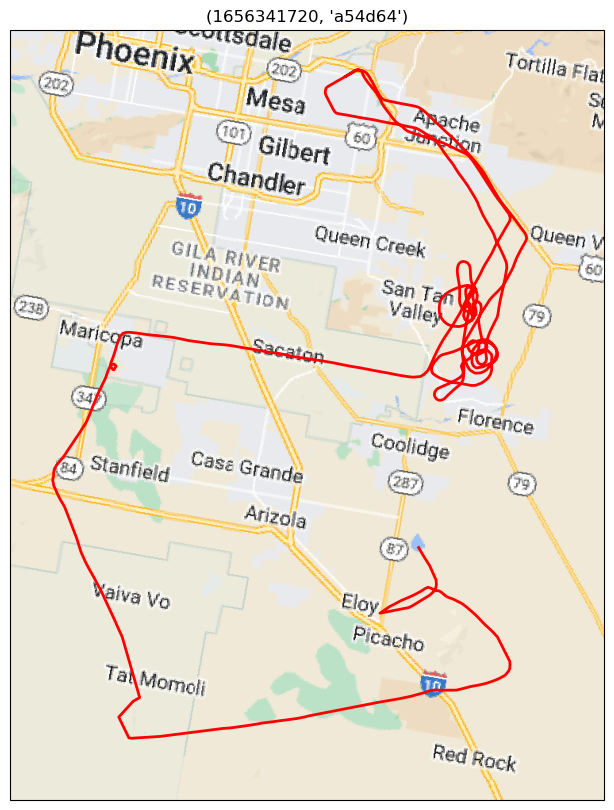

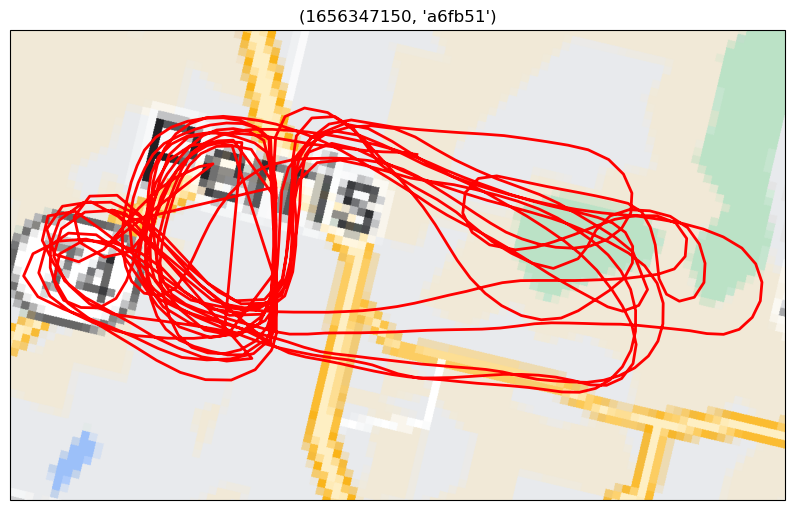

In [431]:
#Per dibuixar la ruta asobre del mapa.
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.io.img_tiles as cimgt

# Inicialitza Google Maps
actual_tiler = cimgt.GoogleTiles()
imagery = CachedTiler(actual_tiler)

for name, flight in flights:
    fig = plt.figure(figsize=(10,10), facecolor='white')
    ax = fig.add_subplot(projection=ccrs.LambertConformal())
    plt.title(name)

    # Posa els limits
    ax.set_extent([ 
        flight.lon.max(), flight.lon.min(),
        flight.lat.min(), flight.lat.max()
    ], crs=ccrs.Geodetic())

    # Dibuixa el fons
    ax.add_image(imagery, 9)

    # Dibuixa la ruta del vol
    track = sgeom.LineString(zip(flight.lon, flight.lat))
    ax.add_geometries([track],
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='red',
                      linewidth=2)